# The Building Blocks of Gradient Descent

Gradient descent is a fundamental part of machine learning and deep learning. This is the core of the mechanism used by the machine to "learn". In this exercise, we will approach the elements that you need to understand gradient descent.

To learn a new motor skill, for instance, we produce gestures, get feedbacks and iterate to optimize the action. Algorithms are learning in a similar way.

The workflow is the following:

- 1. Start with some random parameter values: we call this random initialization. Zero initialization is also possible.
- 2. Calculate the output of the algorithm with these parameters: this is call **forward propagation**.
- 3. Calculate the error with these parameters: we compare the output of the algorithm with the ground truth (for this reason, we need the ground truth: this is a supervised algorithm).
- 4. Evaluate how to change each parameter to reduce the error (let's consider this as a black box for now - we'll open the box in latter exercises) and update the parameters: this is called **backward propagation**.

## 1. Data Exploration

For this exercise, we'll use the [Ciqual dataset](https://ciqual.anses.fr/#) showing the composition of food.🌽

Let's start importing the libraries and loading a simplified version of the ciqual dataset.


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
data = pd.read_csv("../data/ciqual_small.csv")

We will use this dataset to predict the amount of phosporus in food according to the amount of zinc.

As usual, your first task is familiarize yourself with the data. You can:

- 1. Display the first rows of the table with Pandas
- 2. Get some description of the features (columns)
- 3. Check that there is no missing values
- 4. Visualize the relation between the variables `Phosphorus (mg/100g)` and `Zinc (mg/100g)`.


In [ ]:
# Your code here


1- Display the first rows of the table with Pandas

In [34]:
data.head()

,alim_ssgrp_nom_eng,alim_nom_eng,Phosphorus (mg/100g),Protein (g/100g),Zinc (mg/100g)
0,pasta. rice and grains,Durum wheat pre-cooked. whole grain. cooked. u...,116.0,5.25,0.48
1,pasta. rice and grains,Asian noodles. plain. cooked. unsalted,43.0,3.50,0.19
2,pasta. rice and grains,Rice. brown. cooked. unsalted,120.0,3.21,0.62
3,pasta. rice and grains,Rice. cooked. unsalted,35.0,2.92,0.26
4,pasta. rice and grains,Rice. parboiled. cooked. unsalted,35.0,2.95,0.10


2- Get some description of the features (columns)


In [38]:
data.describe()

,Phosphorus (mg/100g),Protein (g/100g),Zinc (mg/100g)
count,53.000000,53.000000,53.000000
mean,184.150943,7.626226,1.607736
std,139.919124,4.380139,1.090756
min,10.000000,0.570000,0.000000
25%,62.000000,3.510000,0.830000
50%,156.000000,7.440000,1.340000
75%,285.000000,11.500000,2.400000
max,557.000000,16.900000,3.970000


3- Check that there is no missing values


In [41]:
data.isna().sum()

alim_ssgrp_nom_eng      0
alim_nom_eng            0
Phosphorus (mg/100g)    0
Protein (g/100g)        0
Zinc (mg/100g)          0
dtype: int64

4- Visualize the relation between the variables `Phosphorus (mg/100g)` and `Zinc (mg/100g)`.


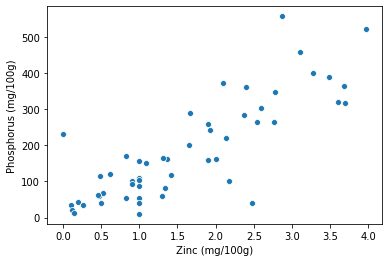

In [35]:
sns.scatterplot('Zinc (mg/100g)','Phosphorus (mg/100g)', data=data)

## 2. Forward Propagation

In linear regression, the goal is to find the parameters of a line (a hyperplane of any number of dimensions) that fits well a set of data points. In this first part, you will code forward propagation using only one dimension. This means that we have only one feature and two parameters (the slope and the intercept of the line).

This is a function taking parameter values as input and returning the prediction (we call prediction the value 'found' by the algorithm).

In linear regression, we want to get the line parameters:

$$
\hat{y} = \theta_0 + \theta_1x
$$

with $\hat{y}$ the predicted value, $\theta_0$ and $\theta_1$ the model parameters (since this is the equation of a line, $\theta_0$ corresponds to the intercept and $\theta_1$ to the slope), and $x$ it the value of the input feature. For instance, if we use linear regression to predict the price of an apartment from the area in square meters, the input feature $x$ is the amount of square meter and $\hat{y}$ is the predicted price.

In this exercise, $\hat{y}$ is the amount of phosphorus (what we try to predict) from our model and $x$ is the amount of zinc.

Your task is first to create a function *hypothesis* `h()` (because it outputs a hypothetical result: the prediction) that takes $x$, $\theta_0$ and $\theta_1$ as inputs and return $\hat{y}$.


In [50]:
# Your code here
def h(x, theta0, theta1):
    pass

In [55]:
def h(x, theta0, theta1):
    y_pred = theta0 + theta1 * x
    return y_pred

To check your function, here are few tests that you can run:

In [66]:
h(x=0.48, theta0=0.7, theta1=1.8)
# should return 1.564

1.564

In [67]:
h(x=0.48, theta0=2, theta1=1)
# should return 2.48

2.48

In [68]:
h(x=0.19, theta0=2, theta1=1)
# should return 2.19

2.19

If you managed to pass the tests, your forward propagation function is working!

## 3. Loss Function - One Sample

If you recall the workflow above, the first step is the parameter initialization. Easy: we'll start with random values for $\theta_0$ and $\theta_1$. The step 2. was the forward propagation that we just coded. So, we can now start the step 3: calculate the error of our model using the MSE.

An loss function is a function that we use to compare a prediction ($\hat{y}$) with the ground truth ($y$). The MSE loss function $L$ is defined with:

$$
L_{\theta_0, \theta_1} = \sum_{i=0}^n (\hat{y} - y)^2
$$

with $n$ the number of samples. For this first part, you will calculate the error for only one sample, so the equation simplifies to:

$$
L_{\theta_0, \theta_1} = (\hat{y} - y)^2
$$

Let's initialize our parameters randomly and use seed to be sure that our results are reproducible:

In [61]:
np.random.seed(123)
theta0 = np.random.rand()
theta1 = np.random.rand()
print(theta0, theta1)

0.6964691855978616 0.28613933495037946


Your exercise is to implement the MSE function and calculate the error for the first 3 samples:

In [77]:
data[:3]

,alim_ssgrp_nom_eng,alim_nom_eng,Phosphorus (mg/100g),Protein (g/100g),Zinc (mg/100g)
0,pasta. rice and grains,Durum wheat pre-cooked. whole grain. cooked. u...,116.0,5.25,0.48
1,pasta. rice and grains,Asian noodles. plain. cooked. unsalted,43.0,3.50,0.19
2,pasta. rice and grains,Rice. brown. cooked. unsalted,120.0,3.21,0.62


Remind that we want to predict the amount of phosphorus from the amount of zinc.

<details>
  <summary>hint</summary>
  You need to use your hypothesis function $h$ from above to calculate $\hat{y}$.
</details>


In [59]:
# Your code here


In [78]:
def L(x, y, theta0, theta1):
    y_hat = h(x, theta0, theta1)
    return (y_hat - y) ** 2

To check your function, here are few tests that you can run. They correspond to the first 3 samples of the Ciqual dataset:

In [79]:
L(x=0.48, y=116, theta0=theta0, theta1=theta1)
# should return 13263.249921833765

13263.249921833765

In [80]:
L(x=0.19, y=43, theta0=theta0, theta1=theta1)
# should return 1784.9918874926789

1784.9918874926789

In [81]:
L(x=0.62, y=120, theta0=theta0, theta1=theta1)
# should return 1784.9918874926789

14191.03352093345

These values correspond to the error of our model for each sample. It seems that the model is not very good, and this is normal, since it is just random for now 😀.

Now, you can try to plot the random regression line along with the data to have an idea of the loss.

In [ ]:
# Your code here


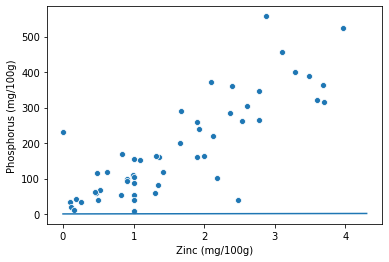

In [86]:
x_line = np.arange(data['Zinc (mg/100g)'].min() - data['Zinc (mg/100g)'].min() / 10,
                   data['Zinc (mg/100g)'].max() + data['Zinc (mg/100g)'].max() / 10,
                  0.1)
y_line = theta0 + theta1 * x_line

sns.scatterplot('Zinc (mg/100g)','Phosphorus (mg/100g)', data=data)
plt.plot(x_line, y_line)

**How to plot linear equations?**

To plot the regression line, we create a variable `x_line` with values with the range we need (according to the samples):


In [87]:
x_line

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3])

And we apply the linear function with our parameters to this array with `y_line = theta0 + theta1 * x_line
`.

In [88]:
y_line

array([0.69646919, 0.72508312, 0.75369705, 0.78231099, 0.81092492,
       0.83953885, 0.86815279, 0.89676672, 0.92538065, 0.95399459,
       0.98260852, 1.01122245, 1.03983639, 1.06845032, 1.09706425,
       1.12567819, 1.15429212, 1.18290606, 1.21151999, 1.24013392,
       1.26874786, 1.29736179, 1.32597572, 1.35458966, 1.38320359,
       1.41181752, 1.44043146, 1.46904539, 1.49765932, 1.52627326,
       1.55488719, 1.58350112, 1.61211506, 1.64072899, 1.66934292,
       1.69795686, 1.72657079, 1.75518472, 1.78379866, 1.81241259,
       1.84102653, 1.86964046, 1.89825439, 1.92686833])

We can then plot the pairs of values `x_line` and `y_line`.

In comparison to the scale of the variable `phosphorus`, the value of $\theta_0$ and $\theta_1$ are very small and the regression line is almost an horizontal line when plotted along the data samples.

We can also represent only the sample we used to calculate the loss 

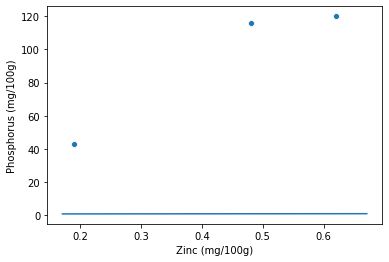

In [85]:
x_line = np.arange(data[:3]['Zinc (mg/100g)'].min() - data[:3]['Zinc (mg/100g)'].min() / 10,
                   data[:3]['Zinc (mg/100g)'].max() + data[:3]['Zinc (mg/100g)'].max() / 10,
                  0.1)
y_line = theta0 + theta1 * x_line

sns.scatterplot('Zinc (mg/100g)','Phosphorus (mg/100g)', data=data[:3])
plt.plot(x_line, y_line)

## 4. Cost Function - Multiple Samples

When applied to multiple data samples, we usually call *cost function* the function calculating the error of prediction.

You will adapt the loss function from 3. to create the MSE cost function. This function will calculate the total error.

In [90]:
# Your code here


In [94]:
def L(x, y, theta0, theta1):
    y_hat = h(x, theta0, theta1)
    return np.sum((y_hat - y) ** 2)

Using the whole dataset and the random initialized parameters you should get:

In [96]:
L(x=data['Zinc (mg/100g)'], y=data['Phosphorus (mg/100g)'], theta0=theta0, theta1=theta1)
# Should return 2789086.39259691

2789086.39259691

## 5. Grid Search to Find Parameters

The last part of the linear regression algorithm is the optimization of our parameters $\theta_0$ and $\theta_1$. But first, we will look at a range of parameter values to the see the impact on the cost. You will do a grid search of parameters $\theta_0$ and $\theta_1$.

- 1. Use your function from 4. to calculate the cost on the whole dataset using different values of $\theta_0$ and $\theta_1$.

Use the following grid of parameters:

In [242]:
theta0_grid = np.arange(-500, 500, 50)
theta1_grid = np.arange(-500, 500, 50)

Your function must take your variables `x`, `y`, `theta0_grid`, and `theta1_grid` as input and return a two-dimensional Numpy array containing the cost values corresponding to each combination of parameter $\theta_0$ and $\theta_1$.

- 2. Store these value in a 2D Numpy array

<details>
<summary>hint</summary>
You can create an array filled with 0. For instance,

```python
np.zeros((2, 2))
```

creates an array of shape $2 \times 2$. You can then fill it with the parameter values.
</details>

In [210]:
# Your code here
def grid_search(x, y, theta0_grid, theta1_grid):
    pass

In [257]:
theta0_grid = np.arange(-500, 500, 50)
theta1_grid = np.arange(-500, 500, 50)

def grid_search(x, y, theta0_grid, theta1_grid):
    cost_all = np.zeros((theta0_grid.shape[0], theta1_grid.shape[0]))

    for i in range(theta0_grid.shape[0]):
        for j in range(theta1_grid.shape[0]):
            cost = L(x, y, theta0=theta0_grid[i], theta1=theta1_grid[j])
            cost_all[i, j] = cost
    return cost_all

In [260]:
cost_all = grid_search(x=data['Zinc (mg/100g)'], y=data['Phosphorus (mg/100g)'],
                       theta0_grid=theta0_grid, theta1_grid=theta1_grid)

You can check your `grid_search()` function with the following test:

In [262]:
cost_all = grid_search(x=data['Zinc (mg/100g)'], y=data['Phosphorus (mg/100g)'],
                       theta0_grid=theta0_grid, theta1_grid=theta1_grid)
cost_all[12, 4]
# Should return 27525475.0

27525475.0

In [263]:
cost_all[7, 18]
# Should return 10732372.0

10732372.0

- 3. Plot this matrix using a heatmap

<details>
<summary>hint</summary>
https://seaborn.pydata.org/generated/seaborn.heatmap.html
</details>


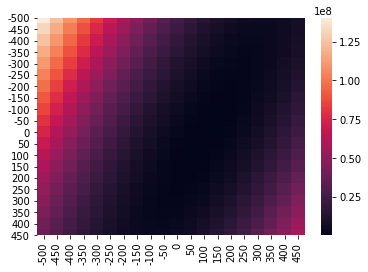

In [264]:
sns.heatmap(cost_all,
           xticklabels = theta1_grid,
           yticklabels = theta0_grid)

There is an issue: since the parameters don't have the same scale, the "good" parameter values (the values that are associated with a low cost) are more spread on one dimension in comparison to the other. It is hard to visualize and to find the good parameters. We will also see later that it is not good for gradient descent to have features scaled differently.

In our case, there is only one feature, we want to normalize it. We also want to normalize the dependent variable in order to insure that the bset parameters will be in the same range which will facilitate the search.

Thus, your next task is to normalize the feature (amount of `zinc`) and the dependent variable (amount of `phosphorus`). To do so, you will create a normalization function.

In [ ]:
# Your code here


In [219]:
def normalize(X):
    return (X - X.mean()) / X.std()

We will copy our dataset to be sure to keep it untouched and normalize the variables on the copy.

In [ ]:
data_norm = data.copy()

To check that your function is correct, run the following test:

In [223]:
normalize(data_norm['Zinc (mg/100g)']).head()
# Should return the following values:
# 0    -1.033903
# 1    -1.299774
# 2    -0.905552
# 3    -1.235598
# 4    -1.382285

0   -1.033903
1   -1.299774
2   -0.905552
3   -1.235598
4   -1.382285
Name: Zinc (mg/100g), dtype: float64

When your `normalize()` function is correct:

- 1. Use it to normalize the variables `zinc` and `phosphorus`.
- 2. Visualize the scatter plot of the normalized data.
- 3. Calculate the cost for every combination of parameter with the function `grid_search()` that you coded above.
- 4. Visualize the new heatmap from normalized data.

In [224]:
# Your code here


1.

In [215]:
data_norm['Zinc (mg/100g)'] = normalize(data_norm['Zinc (mg/100g)'])
data_norm['Phosphorus (mg/100g)'] = normalize(data_norm['Phosphorus (mg/100g)'])

2.

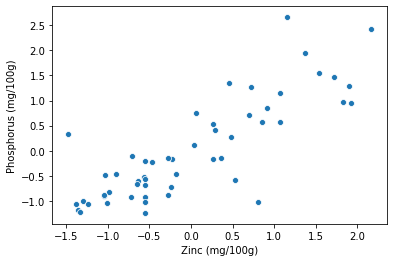

In [225]:
sns.scatterplot('Zinc (mg/100g)','Phosphorus (mg/100g)', data=data_norm)

We can see that the normalized data are centered around 0.

3.

In [265]:
cost_all_norm = grid_search(x=data_norm['Zinc (mg/100g)'], y=data_norm['Phosphorus (mg/100g)'],
                            theta0_grid=theta0_grid, theta1_grid=theta1_grid)


4.

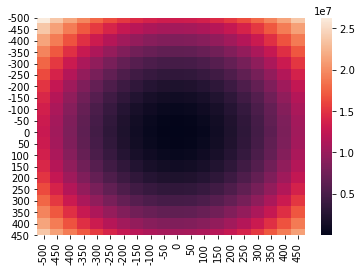

In [266]:
sns.heatmap(cost_all_norm,
           xticklabels = theta1_grid,
           yticklabels = theta0_grid)

Let's zoom in a bit. You can repeat the same steps using a new range for our grid:

In [267]:
theta0_grid = np.arange(-2, 2, 0.2)
theta1_grid = np.arange(-2, 2, 0.2)

In [268]:
# Your code here


In [269]:
cost_all_norm = grid_search(x=data_norm['Zinc (mg/100g)'], y=data_norm['Phosphorus (mg/100g)'],
                            theta0_grid=theta0_grid, theta1_grid=theta1_grid)

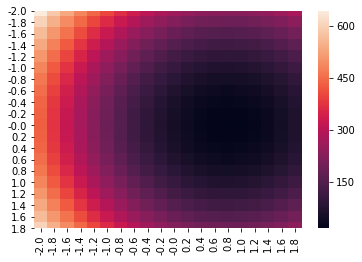

In [270]:
sns.heatmap(cost_all_norm,
           xticklabels = theta1_grid.round(2),
           yticklabels = theta0_grid.round(2))


The last thing to do it to extract the parameters associated with the lower cost from the array `cost_all`.

In [ ]:
# Your code here


In [208]:
best_params = np.unravel_index(cost_all.argmin(), cost_all.shape)

a = theta0_grid[best_params[0]]
b = theta1_grid[best_params[1]]

Let's call `a` the slope corresponding to the best $\theta_0$ and `b` the intercept corresponding to the best $\theta_1$. You should have found the following parameters.:

In [271]:
print(a, b)
# Should return -4.440892098500626e-16 0.7999999999999994

-4.440892098500626e-16 0.7999999999999994


This means that the intercept is almost 0 and the slope is 0.8.

Finally, you can plot the line with these parameters to see if it fits our data samples.

In [ ]:
# Your code here


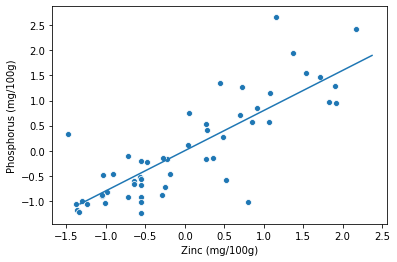

In [209]:
x_line = np.arange(data_norm['Zinc (mg/100g)'].min() - data_norm['Zinc (mg/100g)'].min() / 10,
                   data_norm['Zinc (mg/100g)'].max() + data_norm['Zinc (mg/100g)'].max() / 10,
                  0.1)
y_line = a + b * x_line

sns.scatterplot('Zinc (mg/100g)','Phosphorus (mg/100g)', data=data_norm)
plt.plot(x_line, y_line)